P = 15, N = 2, M = 1
X = [[ 0.  3.]
 [ 1.  3.]
 [ 1.  2.]
 [ 2.  2.]
 [ 2.  4.]
 [ 5.  8.]
 [ 0. -3.]
 [ 1. -3.]
 [ 1. -2.]
 [ 2. -4.]
 [ 3.  1.]
 [ 3.  0.]
 [ 3. -2.]
 [ 4. -1.]
 [ 5.  1.]]
y = [[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


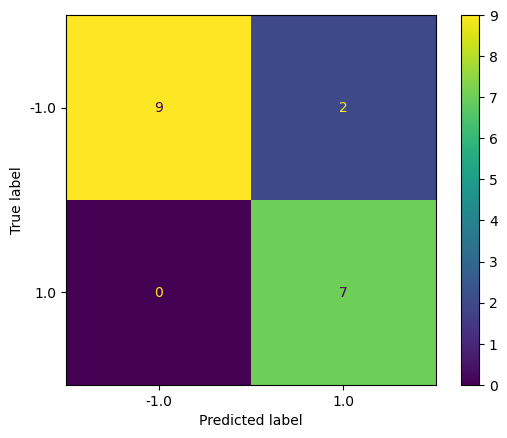

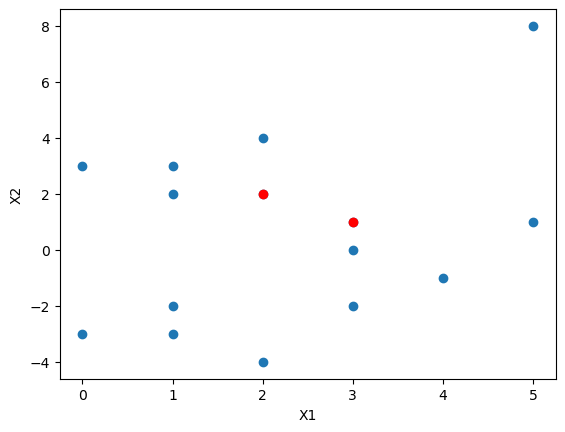

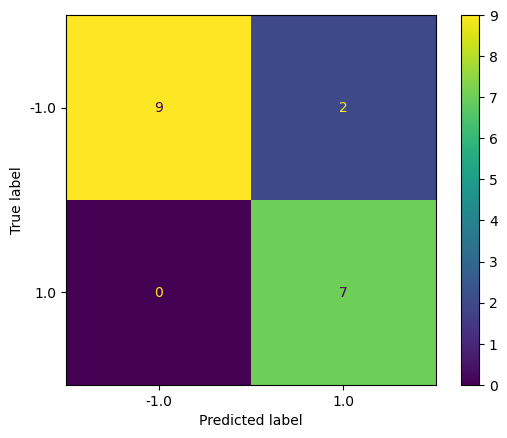

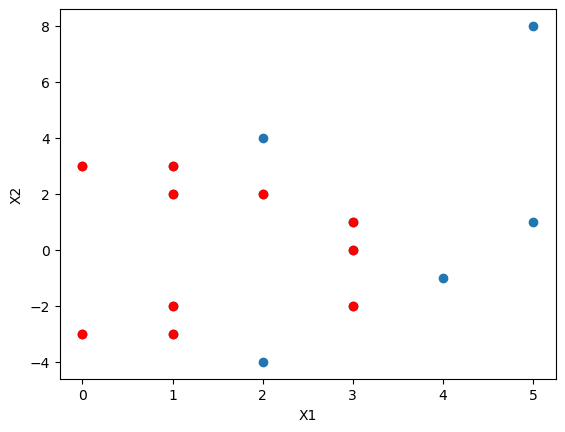

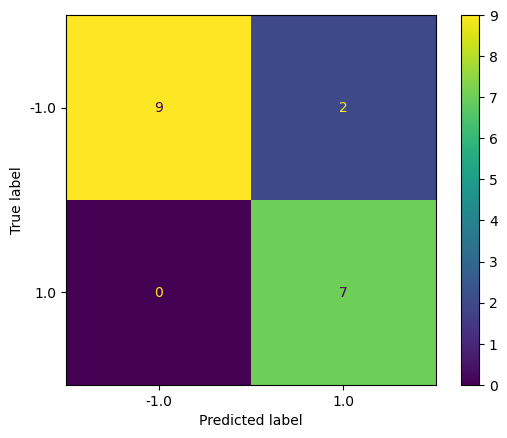

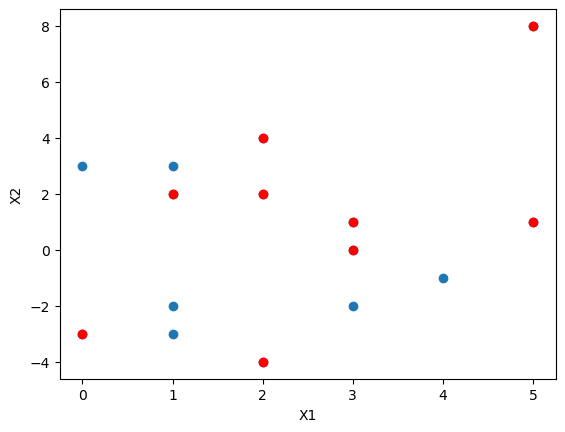

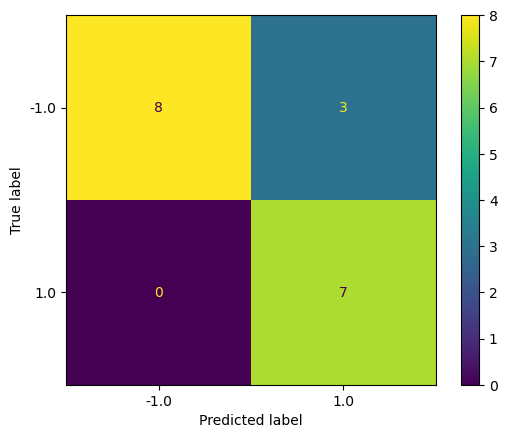

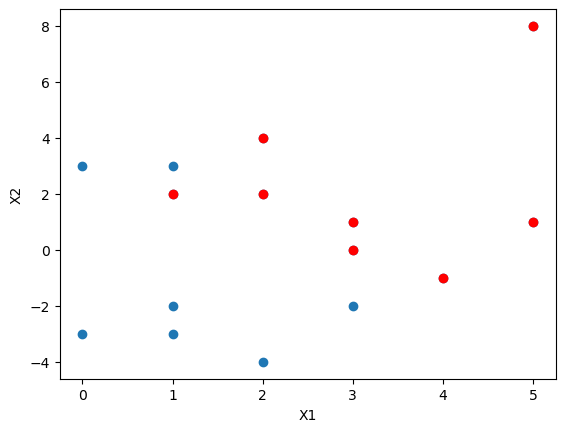

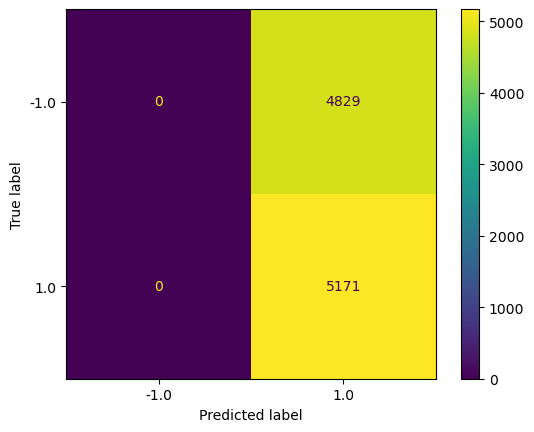

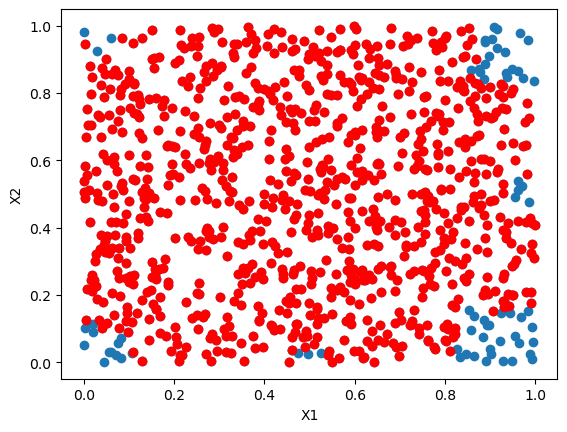

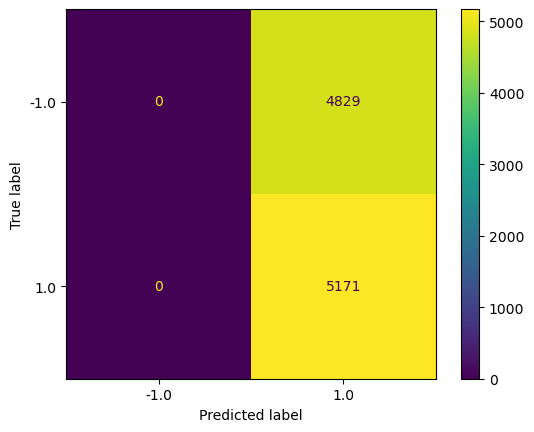

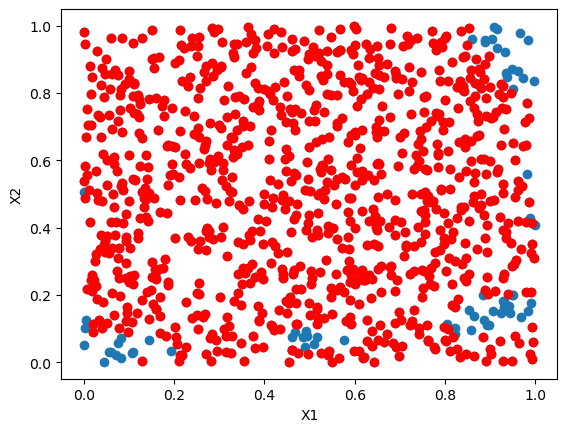

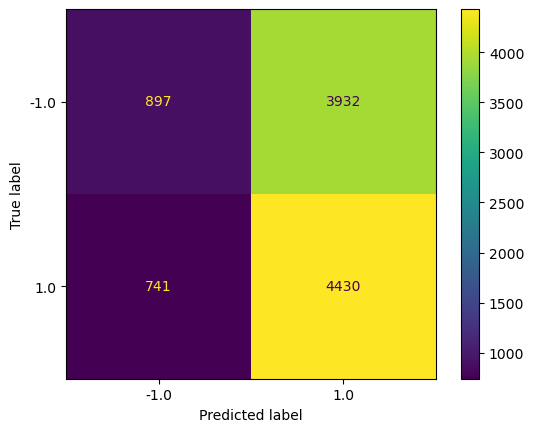

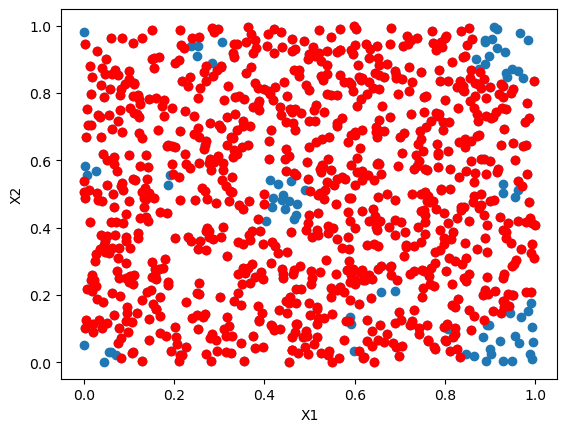

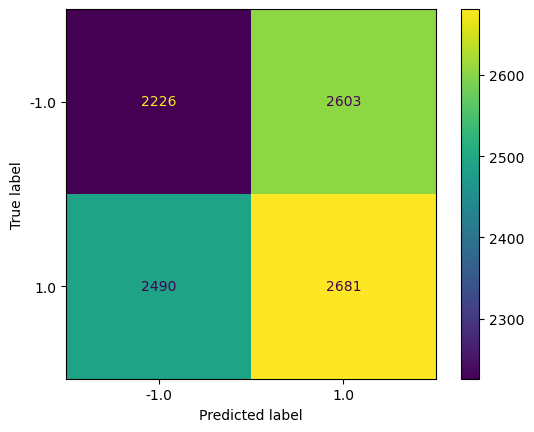

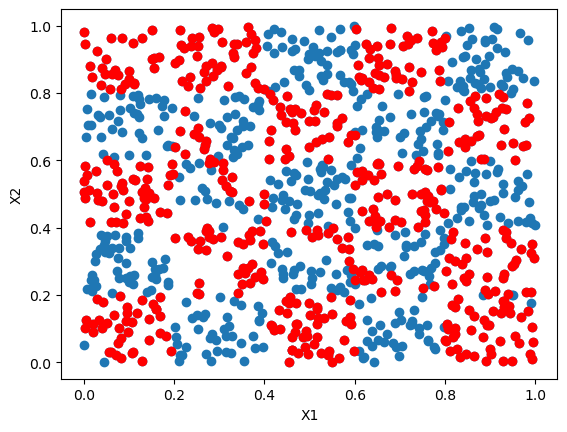

In [13]:
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import re
import requests


def parse_text_file(text):
    data = text.split('\n')
    
    # reading P, N, M using re
    P, N, M = map(int, re.findall(r'\d+', data[1]))
    
    X = np.zeros((P,N))
    y = np.zeros((P,M))
    for i, line in enumerate(data[2: 2 + P]):
        nums = list(map(float, line.split()))
        X[i] = nums[:N]
        y[i] = nums[N:]
    return P, N, M, X, y

train_file1 = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-G-train-t1.txt'
).text

P, N, M, X, y = parse_text_file(
    train_file1
    )
print(f'P = {P}, N = {N}, M = {M}')
print('X =', X)
print('y =', y)

train_file2 = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-G-train-t6.txt'
).text

test_file1 = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-G-test-t1.txt'
).text

test_file2 = requests.get(
  'https://raw.githubusercontent.com/SvetlanaSeliunina/TNN/main/PA-G-test-t6.txt'
).text

files = [[train_file1, test_file1], [train_file2, test_file2]]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for file in files:
    P_train, N_train, M_train, X_train, y_train = parse_text_file(file[0])
    P_test, N_test, M_test, X_test, y_test = parse_text_file(file[1])
    
    for kernel in kernels:
        clf = svm.SVC(kernel=kernel)
        clf = clf.fit(X_train, np.ravel(y_train))
        predictions = clf.predict(X_test)

        cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
        disp.plot()
        plt.show()
        support_vectors = clf.support_vectors_
        
        plt.scatter(X_train[:,0], X_train[:,1])
        plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()
    